In [1]:
from helper import*
import params as cfg

In [2]:
#  import csv

dfM = pd.read_csv('/Users/joshuaighalo/Downloads/music2.csv')
dfC = pd.read_csv('/Users/joshuaighalo/Downloads/control2.csv')

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


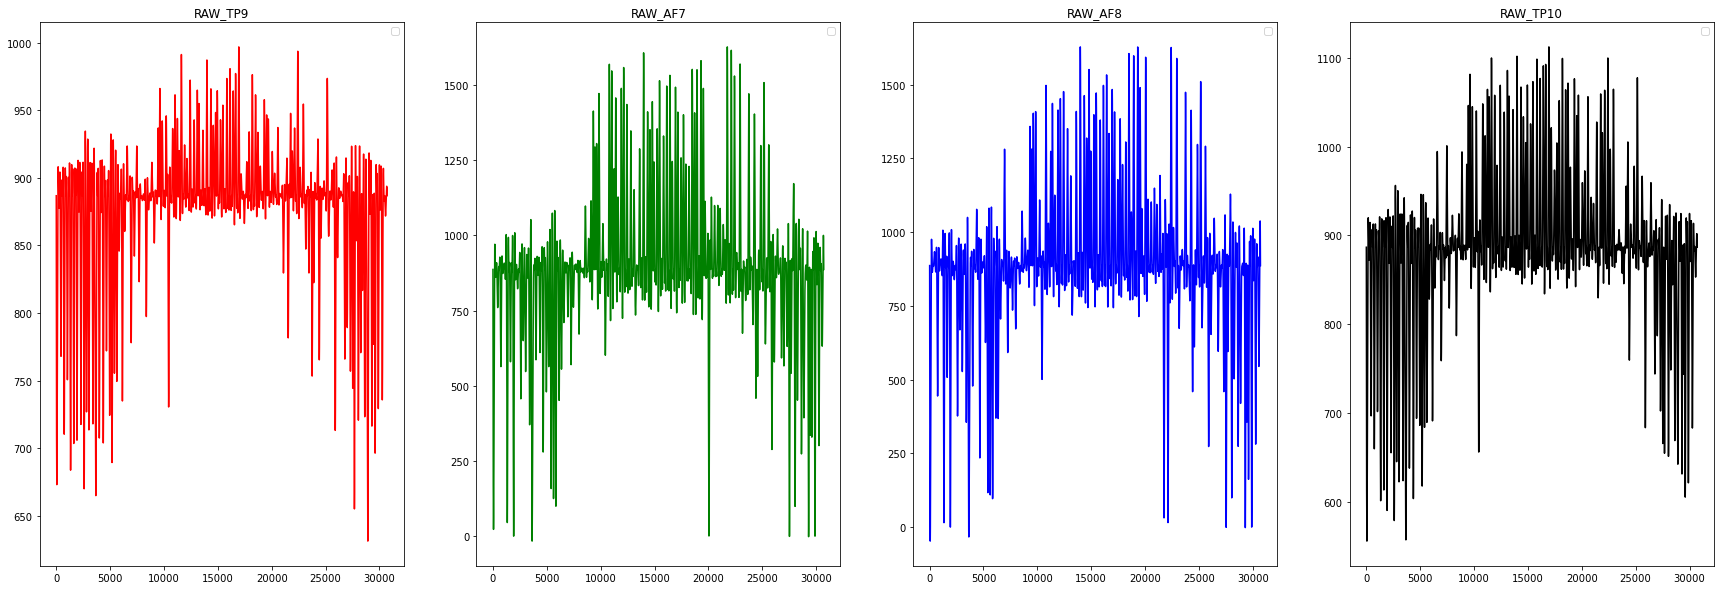

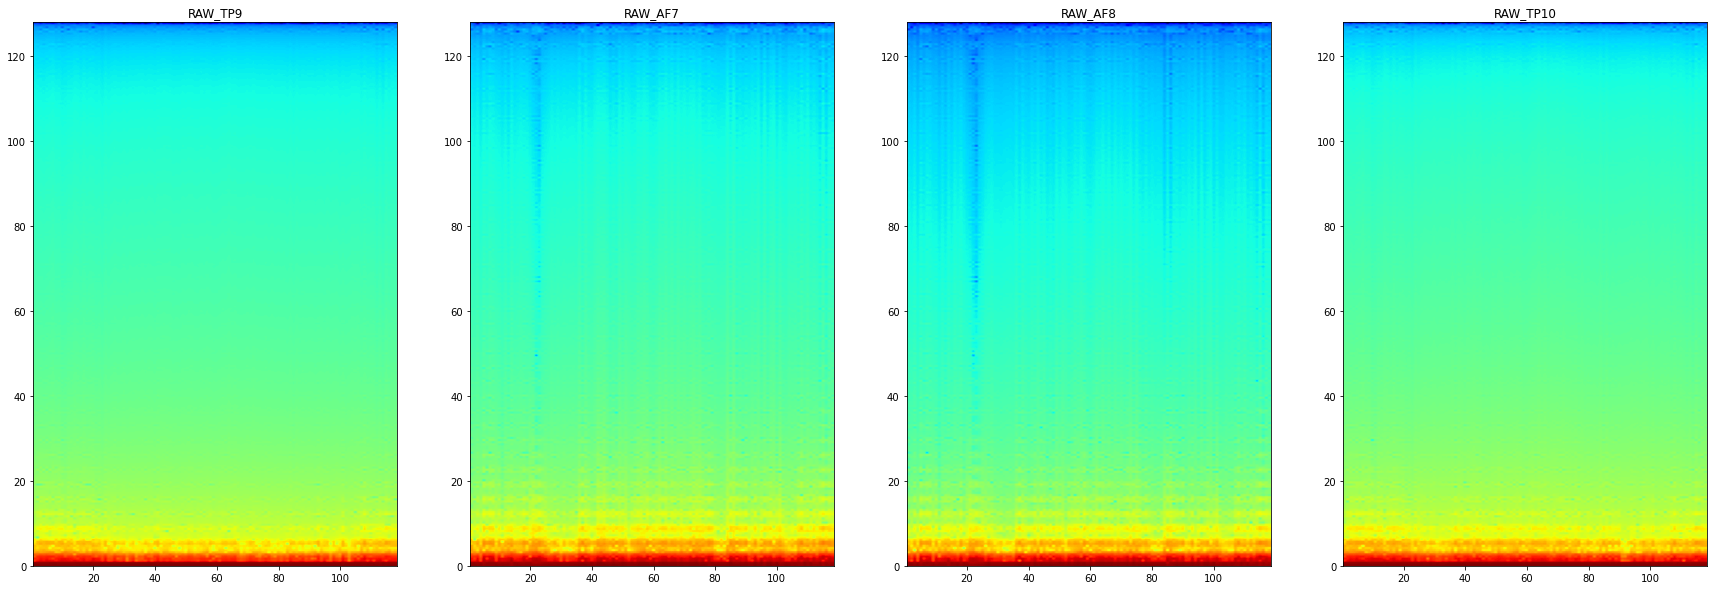

In [18]:
rawEEGM = dfM[['RAW_TP9','RAW_AF7','RAW_AF8','RAW_TP10']].to_numpy()
# convert data to numpy array

def insertNans(data_2d):
    def insert_zeros_n(arr, n=73):
        ind = np.repeat([i+1 for i in range(len(arr)-1)], n) # where to insert zeros
        return np.insert(arr, ind, np.nan) # insert zeros
    output = []
    for i in range(len(data_2d.T)):
        output.append(insert_zeros_n(data_2d[:,i]))
    output = np.array(output)
    return output.T


rawEEGM = np.nan_to_num(rawEEGM,nan=np.nanmean(rawEEGM))
test = insertNans(rawEEGM)

test_df = pd.DataFrame(test, columns = ['RAW_TP9','RAW_AF7','RAW_AF8','RAW_TP10'])
new_test_df = test_df.interpolate(method='polynomial', order=3,limit_direction='both', axis=0)
fig,ax = plt.subplots(1,4,figsize=(30,10))
ax[0].plot(new_test_df['RAW_TP9'],color='red')
ax[1].plot(new_test_df['RAW_AF7'],color='green')
ax[2].plot(new_test_df['RAW_AF8'],color='blue')
ax[3].plot(new_test_df['RAW_TP10'],color='black')
ax[0].set_title('RAW_TP9')
ax[1].set_title('RAW_AF7')
ax[2].set_title('RAW_AF8')
ax[3].set_title('RAW_TP10')
plt.show()

# plot spectrogram
fig, ax = plt.subplots(1,4,figsize=(30,10))
ax[0].specgram(new_test_df['RAW_TP9'], Fs=256, NFFT=512, noverlap=256, cmap='jet')
ax[1].specgram(new_test_df['RAW_AF7'], Fs=256, NFFT=512, noverlap=256, cmap='jet')
ax[2].specgram(new_test_df['RAW_AF8'], Fs=256, NFFT=512, noverlap=256, cmap='jet')
ax[3].specgram(new_test_df['RAW_TP10'], Fs=256, NFFT=512, noverlap=256, cmap='jet')
ax[0].set_title('RAW_TP9')
ax[1].set_title('RAW_AF7')
ax[2].set_title('RAW_AF8')
ax[3].set_title('RAW_TP10')
plt.show()

In [ ]:

upFs,duration = 256,120
#rawEEGM = signal.resample(rawEEGM,upFs*duration)
rawEEGC = dfC[['RAW_TP9','RAW_AF7','RAW_AF8','RAW_TP10']].to_numpy()
rawEEGC = np.nan_to_num(rawEEGC,nan=np.nanmean(rawEEGC))
#rawEEGC = signal.resample(rawEEGC,upFs*duration)
fs = 2
#time_M = np.arange(0, len(rawEEGM) * (1.0/fs), (1.0/fs))
#time_C = np.arange(0, len(rawEEGC) * (1.0/fs), (1.0/fs))
#  repeat numpy array to match length of rawEEG
newEEG = rawEEGM[:,0]
#  add noise
m, s = np.mean(newEEG), np.std(newEEG)
noise = np.random.normal(m, s, newEEG.shape)
newEEG = newEEG + noise
#  resample
newEEG = signal.resample(newEEG,upFs*duration)
#  plot
plt.plot(newEEG)
plt.show()

f,p = psd(newEEG,fs=256,data_1D=True)
plt.plot(f,p)
plt.xlim(0,50)
plt.show()